In [16]:
import pandas as pd
df=pd.read_csv('cupcake.csv')
df.head(5)

,Mes,Cupcake
0,2004-01,5
1,2004-02,6
2,2004-03,5
3,2004-04,6
4,2004-05,5


In [17]:
min_value = df['Cupcake'].min()
max_value = df['Cupcake'].max()
print(min_value)
print(max_value)

5
100


In [18]:
import numpy as np
bins = np.linspace(min_value,max_value,4)
bins

array([  5.        ,  36.66666667,  68.33333333, 100.        ])

In [19]:
labels = ['small', 'medium', 'big']

In [20]:
df['bins'] = pd.cut(df['Cupcake'], bins=bins, labels=labels, include_lowest=True)

(array([71., 98., 61.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

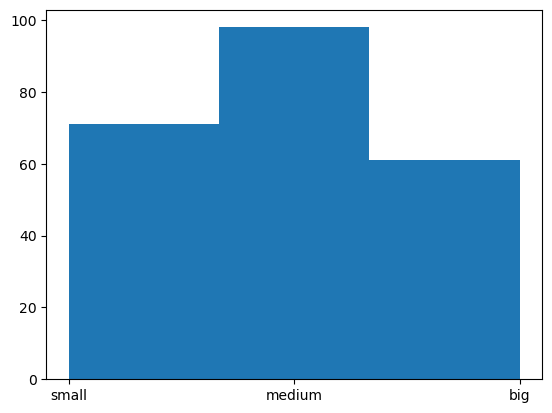

In [21]:
import matplotlib.pyplot as plt
plt.hist(df['bins'], bins=3)

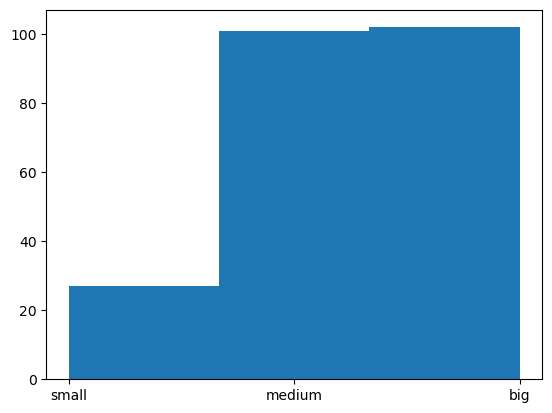

In [22]:
bins = [ 0, 10, 50, 100 ]
df['bin_cut_manual'] = pd.cut(df['Cupcake'] , bins=bins, labels=labels, include_lowest=True)
plt.hist(df['bin_cut_manual'], bins=3)
plt.show()

In [23]:
df['bin_qcut'] = pd.qcut(df['Cupcake'], q=3, precision=1, labels=labels)

In [25]:
from scipy.stats import binned_statistic
x_data = np.arange(0, len(df))
y_data = df['Cupcake']
x_bins,bin_edges, misc = binned_statistic(y_data,x_data, statistic="median", bins=2)

In [26]:
bin_intervals = pd.IntervalIndex.from_arrays(bin_edges[:-1], bin_edges[1:])

In [27]:
def set_to_median(x, bin_intervals):
    for interval in bin_intervals:
        if x in interval:
            return interval.mid

In [28]:
df['sampled_cupcake'] = df['Cupcake'].apply(lambda x: set_to_median(x, bin_intervals))

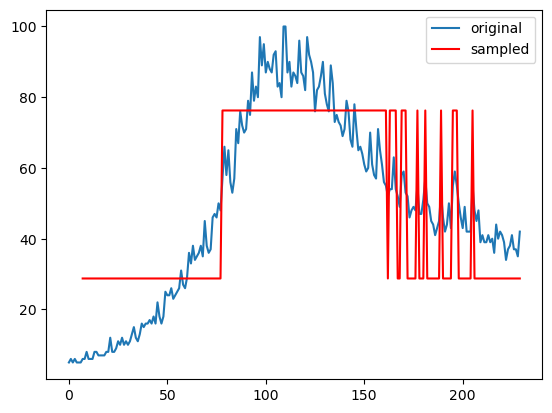

In [29]:
plt.plot(df['Cupcake'], label='original')
plt.plot(df['sampled_cupcake'], color='red', label='sampled')
plt.legend()
plt.show()

In [30]:
y_bins = (bin_edges[:-1]+bin_edges[1:])/2
y_bins

array([28.75, 76.25])

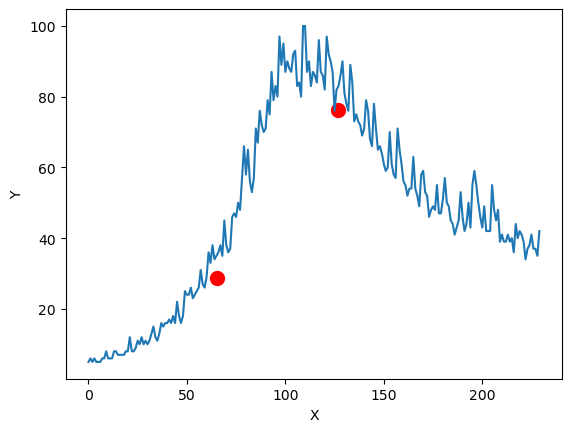

In [31]:
plt.plot(x_data,y_data)
plt.xlabel("X"); 
plt.ylabel("Y")
plt.scatter(x_bins, y_bins,  color= 'red',linewidth=5)
plt.show()